# Dogs vs. Catsを畳み込みニューラルネットワークで解く

## パッケージ群のインポート

In [93]:
import tensorflow
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
!pip install cv2

  ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [95]:
import os, cv2, random
import numpy as np
import pandas as pd

In [96]:
from matplotlib import ticker
import seaborn as sns

## トレーニング・テストデータの作成

In [97]:
TRAIN_DIR = "./Dogs_and_Cats/train/"
TEST_DIR = "./Dogs_and_Cats/test/"

In [98]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [99]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [100]:
train_images

['./Dogs_and_Cats/train/cat.0.jpg',
 './Dogs_and_Cats/train/cat.1.jpg',
 './Dogs_and_Cats/train/cat.10.jpg',
 './Dogs_and_Cats/train/cat.100.jpg',
 './Dogs_and_Cats/train/cat.1000.jpg',
 './Dogs_and_Cats/train/cat.10000.jpg',
 './Dogs_and_Cats/train/cat.10001.jpg',
 './Dogs_and_Cats/train/cat.10002.jpg',
 './Dogs_and_Cats/train/cat.10003.jpg',
 './Dogs_and_Cats/train/cat.10004.jpg',
 './Dogs_and_Cats/train/cat.10005.jpg',
 './Dogs_and_Cats/train/cat.10006.jpg',
 './Dogs_and_Cats/train/cat.10007.jpg',
 './Dogs_and_Cats/train/cat.10008.jpg',
 './Dogs_and_Cats/train/cat.10009.jpg',
 './Dogs_and_Cats/train/cat.1001.jpg',
 './Dogs_and_Cats/train/cat.10010.jpg',
 './Dogs_and_Cats/train/cat.10011.jpg',
 './Dogs_and_Cats/train/cat.10012.jpg',
 './Dogs_and_Cats/train/cat.10013.jpg',
 './Dogs_and_Cats/train/cat.10014.jpg',
 './Dogs_and_Cats/train/cat.10015.jpg',
 './Dogs_and_Cats/train/cat.10016.jpg',
 './Dogs_and_Cats/train/cat.10017.jpg',
 './Dogs_and_Cats/train/cat.10018.jpg',
 './Dogs_and_Ca

In [101]:
len(train_images)

25000

In [102]:
train_images[1000]

'./Dogs_and_Cats/train/cat.10898.jpg'

### リストの内包表記

In [103]:
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]

In [104]:
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [105]:
len(train_dogs)

12500

In [106]:
len(train_cats)

12500

In [107]:
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [108]:
len(test_images)

12500

### リストのスライス処理

In [109]:
train_images = train_dogs[:1000] + train_cats[:1000]

In [110]:
len(train_images)

2000

In [111]:
random.shuffle(train_images)

In [112]:
test_images =  test_images[:25]

In [113]:
len(test_images)

25

### 画像ファイルを多次元配列に変換する

In [114]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [115]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T #transpose mxn > nxm
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
            
    return data
        

In [116]:
train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25


In [117]:
train.shape

(2000, 3, 64, 64)

In [118]:
test.shape

(25, 3, 64, 64)

### ラベル一覧をリスト型変数に格納しよう

In [119]:
labels = []
for i in train_images:
    if 'dog.' in i:
        labels.append(1)
    else:
        labels.append(0)

In [120]:
labels[0:10]

[0, 1, 1, 1, 0, 1, 0, 1, 0, 1]

In [121]:
train_images[0:10]

['./Dogs_and_Cats/train/cat.10125.jpg',
 './Dogs_and_Cats/train/dog.1063.jpg',
 './Dogs_and_Cats/train/dog.10133.jpg',
 './Dogs_and_Cats/train/dog.10431.jpg',
 './Dogs_and_Cats/train/cat.10823.jpg',
 './Dogs_and_Cats/train/dog.10636.jpg',
 './Dogs_and_Cats/train/cat.1042.jpg',
 './Dogs_and_Cats/train/dog.100.jpg',
 './Dogs_and_Cats/train/cat.10059.jpg',
 './Dogs_and_Cats/train/dog.10502.jpg']

Text(0.5, 1.0, 'Cats and Dogs')

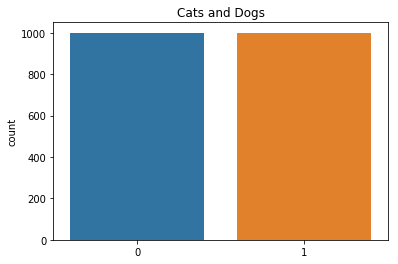

In [122]:
sns.countplot(labels)
plt.title('Cats and Dogs')

### 画像データの確認

In [123]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

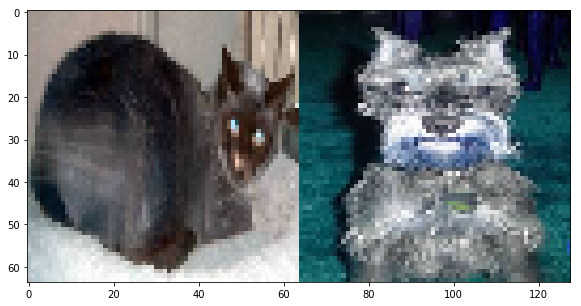

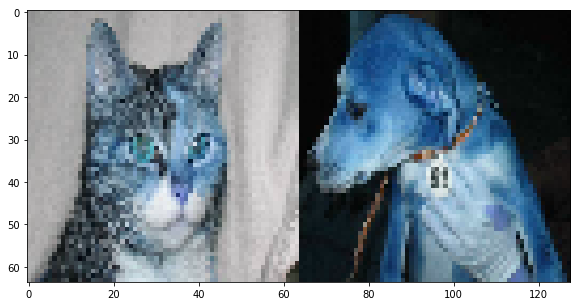

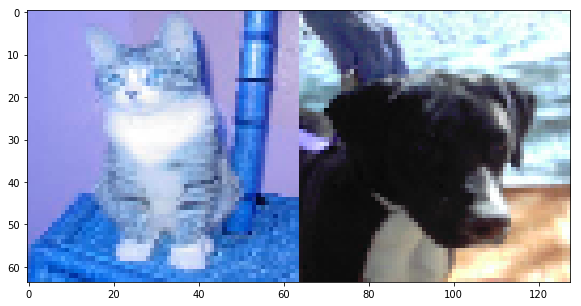

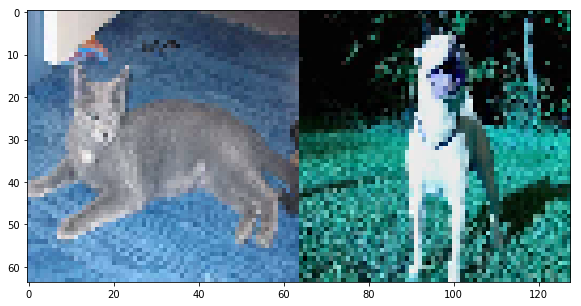

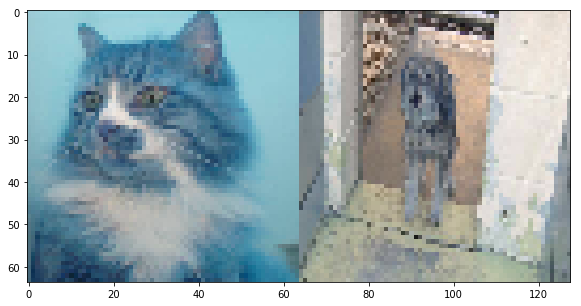

In [124]:
for idx in range(10,15):
    show_cats_and_dogs(idx)

### ピクセル値を平均して画像を生成する

Text(0.5, 1.0, 'Your Average Dog')

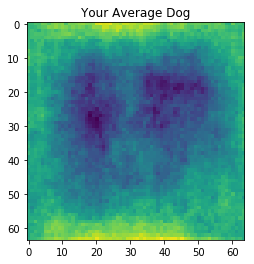

In [125]:
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(dog_avg)
plt.title('Your Average Dog')


Text(0.5, 1.0, 'Your Average Cat')

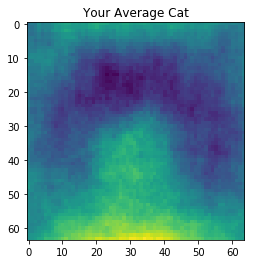

In [126]:
cat_avg = np.array([cat[0].T for i, cat in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(cat_avg)
plt.title('Your Average Cat')

### CatdogNet-16 を定義しよう

In [127]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [128]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3, ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = catdog()
    


### トレーニングを実行しよう

In [129]:
nb_epoch = 10
batch_size = 16

class LossHistory(Callback):
    def on_train_begin(self,logs={}):
        self.losses=[]
        self.val_losses=[]
        
    def on_epoch_end(self,batch,logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='auto')

def run_catdog():

    history=LossHistory()
    model.fit(train, labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True,callbacks=[history, early_stopping])
    

    predictions = model.predict(test, verbose=0)#推定
    return predictions, history

predictions, history = run_catdog()
# タプルで受け取る


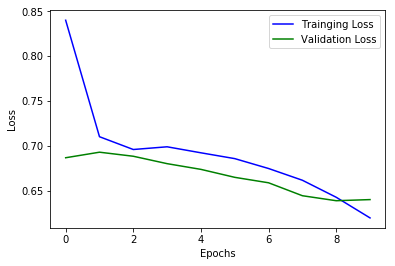

In [130]:
#ロスをプロットしよう
loss=history.losses
val_loss=history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Trainging Loss')
plt.plot(val_loss,'green',label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [135]:
test_pred=model.predict(test, verbose=0)#推定
print(test_pred)
len(test_pred)

[[0.15960848]
 [0.12708858]
 [0.34299296]
 [0.6630004 ]
 [0.77179736]
 [0.34064752]
 [0.20504594]
 [0.76604533]
 [0.4824021 ]
 [0.17506784]
 [0.54963934]
 [0.31203124]
 [0.37907833]
 [0.7685313 ]
 [0.82176363]
 [0.7946524 ]
 [0.6428749 ]
 [0.20485315]
 [0.6777603 ]
 [0.3070383 ]
 [0.47018683]
 [0.26929358]
 [0.54790705]
 [0.6790844 ]
 [0.63492167]]


25

In [ ]:
#pred=model.predict(test_pred)

In [ ]:
pred=model.predict_proba(test_pred)
print(pred)

In [ ]:
Output['label']=pred[:,1]
Output[0:10]